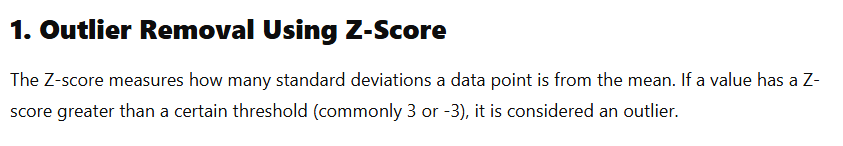

In [1]:
import numpy as np
import pandas as pd
from scipy import stats

# Sample data
data = {'values': [10, 12, 13, 15, 14, 12, 11, 300, 12, 13, 14]}
df = pd.DataFrame(data)

# Compute Z-score
df['z_score'] = np.abs(stats.zscore(df['values']))

# Define threshold
threshold = 3

# Remove outliers
df_cleaned = df[df['z_score'] < threshold]
print(df_cleaned)


    values   z_score
0       10  0.347649
1       12  0.323446
2       13  0.311344
3       15  0.287141
4       14  0.299242
5       12  0.323446
6       11  0.335548
8       12  0.323446
9       13  0.311344
10      14  0.299242


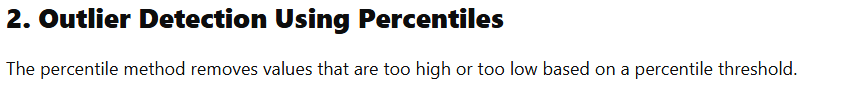


In [3]:
# Define percentile thresholds
lower_bound = df['values'].quantile(0.05)  # 5th percentile
upper_bound = df['values'].quantile(0.95)  # 95th percentile

# Remove outliers
df_cleaned = df[(df['values'] >= lower_bound) & (df['values'] <= upper_bound)]
print(df_cleaned)


    values   z_score
1       12  0.323446
2       13  0.311344
3       15  0.287141
4       14  0.299242
5       12  0.323446
6       11  0.335548
8       12  0.323446
9       13  0.311344
10      14  0.299242


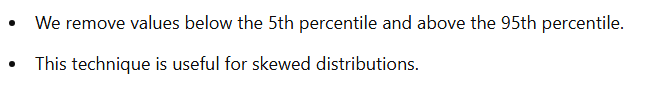

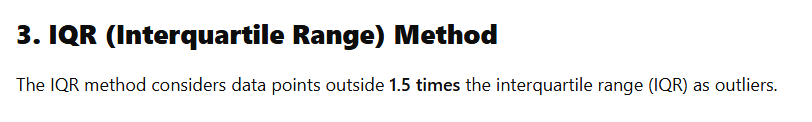

In [4]:
Q1 = df['values'].quantile(0.25)  # 25th percentile
Q3 = df['values'].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_cleaned = df[(df['values'] >= lower_bound) & (df['values'] <= upper_bound)]
print(df_cleaned)


    values   z_score
0       10  0.347649
1       12  0.323446
2       13  0.311344
3       15  0.287141
4       14  0.299242
5       12  0.323446
6       11  0.335548
8       12  0.323446
9       13  0.311344
10      14  0.299242


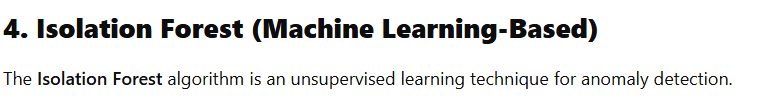

In [5]:
from sklearn.ensemble import IsolationForest

# Create model
iso_forest = IsolationForest(contamination=0.1, random_state=42)

# Fit and predict anomalies
df['anomaly'] = iso_forest.fit_predict(df[['values']])

# Remove outliers (labeled as -1)
df_cleaned = df[df['anomaly'] == 1]
print(df_cleaned)


    values   z_score  anomaly
0       10  0.347649        1
1       12  0.323446        1
2       13  0.311344        1
3       15  0.287141        1
4       14  0.299242        1
5       12  0.323446        1
6       11  0.335548        1
8       12  0.323446        1
9       13  0.311344        1
10      14  0.299242        1


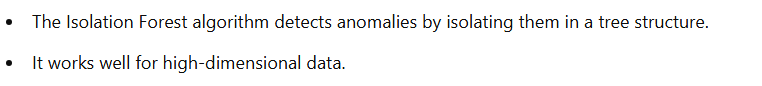

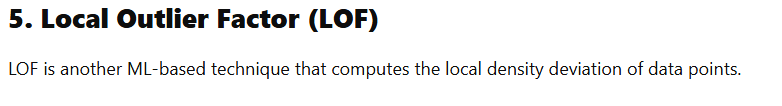

In [6]:
from sklearn.neighbors import LocalOutlierFactor

# Create model
lof = LocalOutlierFactor(n_neighbors=5)

# Predict anomalies (-1 indicates outliers)
df['anomaly'] = lof.fit_predict(df[['values']])

# Remove outliers
df_cleaned = df[df['anomaly'] == 1]
print(df_cleaned)


    values   z_score  anomaly
1       12  0.323446        1
2       13  0.311344        1
4       14  0.299242        1
5       12  0.323446        1
6       11  0.335548        1
8       12  0.323446        1
9       13  0.311344        1
10      14  0.299242        1


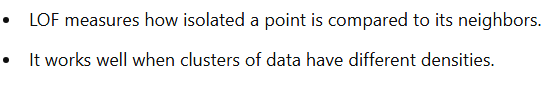

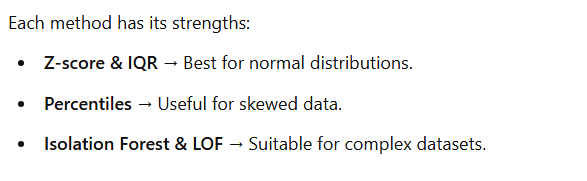